In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import hddm
import kabuki
print(hddm.__version__)

0.9.5


## loading data

In [15]:
data = hddm.load_csv('simple_sim.csv')
data.head()

,sub_id,valence,matchness,sequence,sub_i,m.e,val.e,seq.e,err,dv
0,1,Bad,match,image_first,-99.658235,-0.5,-0.333333,-0.333333,-10.365970,243.864684
1,1,Bad,match,simultaneus,-99.658235,-0.5,-0.333333,0.666667,13.244509,310.808496
2,1,Bad,match,word_first,-99.658235,-0.5,-0.333333,-0.333333,0.394633,254.625287
3,1,Bad,mismatch,image_first,-99.658235,0.5,-0.333333,-0.333333,-19.847212,266.605664
4,1,Bad,mismatch,simultaneus,-99.658235,0.5,-0.333333,0.666667,14.803058,337.922600


In [20]:
data = data[["sub_id", "dv", "matchness", "valence", "sequence"]]
data.head()

,sub_id,dv,matchness,valence,sequence
0,1,243.864684,match,Bad,image_first
1,1,310.808496,match,Bad,simultaneus
2,1,254.625287,match,Bad,word_first
3,1,266.605664,mismatch,Bad,image_first
4,1,337.922600,mismatch,Bad,simultaneus


In [30]:
data = data.rename(columns = {"sub_id":"subj_idx", "dv" : "rt", "matchness" : "response"})

In [31]:
data[["rt"]] = data[["rt"]] / 1000

In [38]:
data[["response"]] = data[["response"]].replace(["match", "mismatch"], [1, 0])

In [39]:
data

,subj_idx,rt,response,valence,sequence
0,1,0.000244,1,Bad,image_first
1,1,0.000311,1,Bad,simultaneus
2,1,0.000255,1,Bad,word_first
3,1,0.000267,0,Bad,image_first
4,1,0.000338,0,Bad,simultaneus
...,...,...,...,...,...
3235,30,0.000448,1,Neutral,simultaneus
3236,30,0.000398,1,Neutral,word_first
3237,30,0.000422,0,Neutral,image_first
3238,30,0.000488,0,Neutral,simultaneus


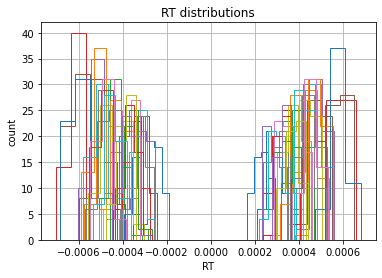

In [40]:
data = hddm.utils.flip_errors(data)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

# plt.savefig('hddm_demo_fig_00.pdf')

In [42]:
m_reg = hddm.HDDMRegressor(data,
                           "v ~ C(sequence, Treatment('simultaneus'))"
                          )
m_reg.sample(50, burn=10)

No model attribute --> setting up standard HDDM
Set model to ddm


/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to 

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  uniq_elem = pd.Series(uniq_elem, index=cols)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:181: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to 

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8/site-packages/kabuki/hierarchical.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.nodes_db = self.nodes_db.append(row)
/opt/conda/lib/python3.8

 [-----------------102%-----------------] 51 of 50 complete in 1387.5 sec

Plotting a
Plotting a_std
Plotting t
Plotting t_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(sequence, Treatment('simultaneus'))[T.image_first]
Plotting v_C(sequence, Treatment('simultaneus'))[T.word_first]


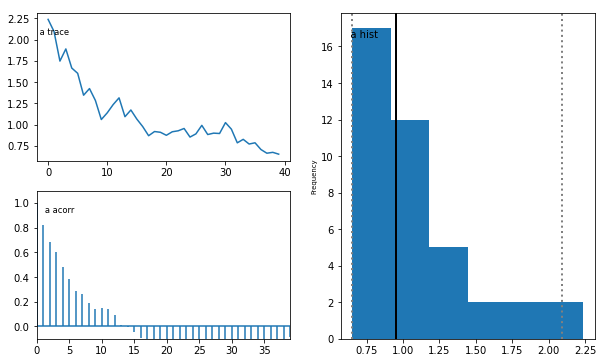

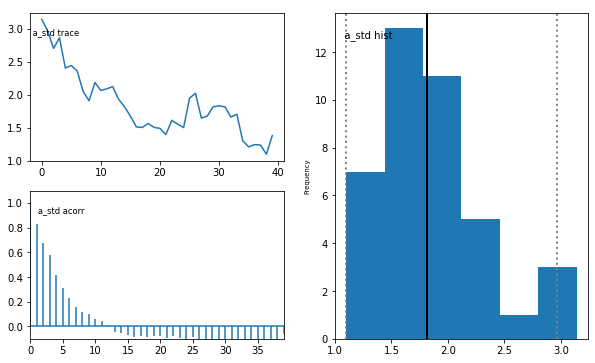

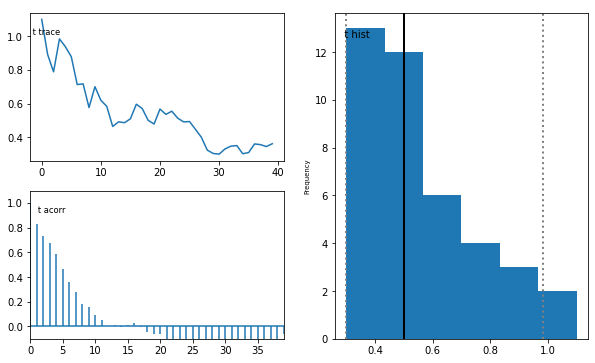

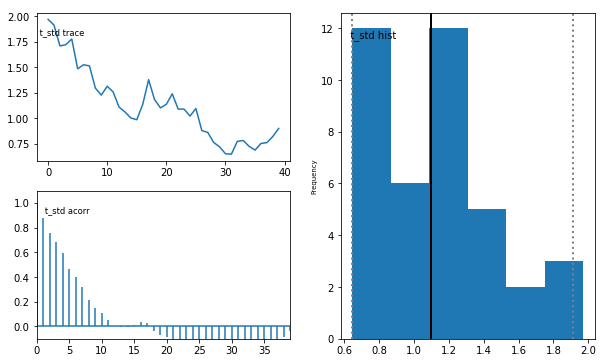

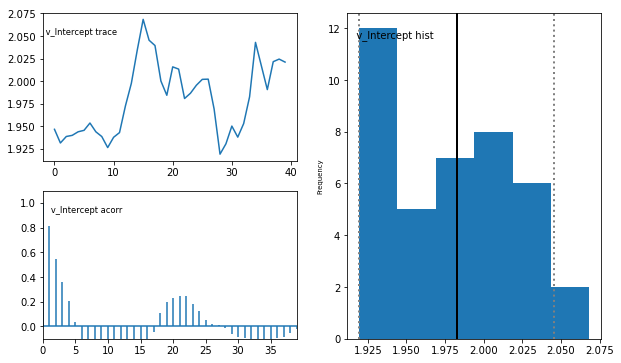

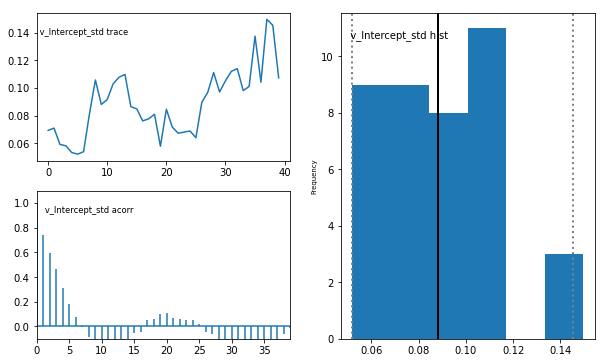

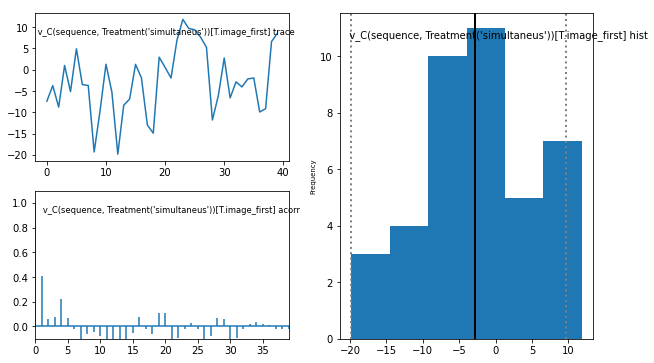

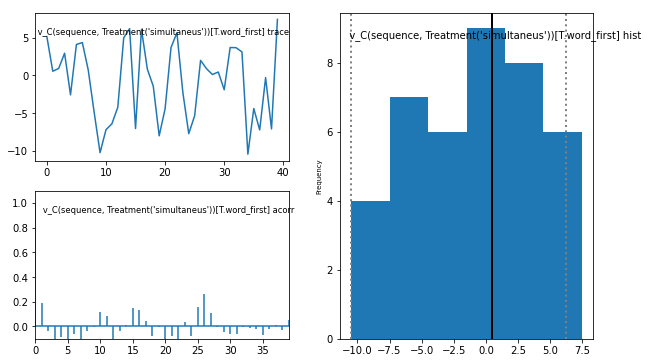

In [44]:
m_reg.plot_posteriors()

In [53]:
%matplotlib inline
m_reg.plot_posterior_predictive(figsize=(14, 10))
plt.show()

<Figure size 1008x720 with 0 Axes>

In [55]:
m_reg.dic

-5551.405741606744

In [56]:
m_reg.gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.098671,0.381581,0.663289,0.873873,0.953976,1.283271,2.236759,0.060333
a_std,1.847561,0.484381,1.209055,1.503758,1.81451,2.087317,3.139117,0.076587
a_subj.1,0.511615,1.057359,0.014339,0.018494,0.024299,0.753279,5.503888,0.167183
a_subj.2,2.059147,1.942174,0.112191,0.536346,1.385202,3.000494,6.700718,0.307085
a_subj.3,0.539815,0.847588,0.000005,0.00017,0.166216,0.68628,4.264734,0.134015
...,...,...,...,...,...,...,...,...
v_Intercept_subj.28,1.97405,0.072182,1.860608,1.921585,1.979231,2.036591,2.122743,0.011413
v_Intercept_subj.29,1.981711,0.094969,1.817505,1.912003,1.978625,2.040559,2.236444,0.015016
v_Intercept_subj.30,1.975056,0.097693,1.74664,1.908837,1.991171,2.061612,2.163926,0.015447
"v_C(sequence, Treatment('simultaneus'))[T.image_first]",-2.676272,7.697481,-19.330461,-7.388493,-2.844195,2.962714,11.844539,1.217079
